In [1]:
import pandas as pd
from prophet import Prophet
import plotly.express as px
import requests
import json

In [2]:
df = pd.read_excel(r'C:\Users\LEONARDO ACUÑA\Documents\6 semestre\MyS\Proyecto-Monitoreo\Backend\src\data\DEUDA.xlsx')
df.head()

,Fecha,Moneda,Interna1_Billo,Externa_Billo,Total_Billo
0,2018-01-31,1,"273,6","137,9","411,5"
1,2018-02-28,1,"279,1","138,3","417,3"
2,2018-03-31,1,"280,6","136,6","417,1"
3,2018-04-30,1,"287,8","138,0","425,8"
4,2018-05-31,1,"293,7","140,6","434,4"


In [3]:
df.shape
df.isnull().sum()

Fecha             0
Moneda            0
Interna1_Billo    0
Externa_Billo     0
Total_Billo       0
dtype: int64

In [4]:
df['ds'] = pd.to_datetime(df['Fecha'],format='%Y%m%d')
print(df)

        Fecha  Moneda Interna1_Billo Externa_Billo Total_Billo         ds
0  2018-01-31       1          273,6         137,9       411,5 2018-01-31
1  2018-02-28       1          279,1         138,3       417,3 2018-02-28
2  2018-03-31       1          280,6         136,6       417,1 2018-03-31
3  2018-04-30       1          287,8         138,0       425,8 2018-04-30
4  2018-05-31       1          293,7         140,6       434,4 2018-05-31
..        ...     ...            ...           ...         ...        ...
62 2022-10-31       1          495,9         353,0       848,9 2022-10-31
63 2022-12-31       1          507,3         365,5       872,7 2022-12-31
64 2023-01-31       1          513,9         353,0       867,0 2023-01-31
65 2023-02-28       1          509,6         373,9       883,4 2023-02-28
66 2023-04-30       1          532,0         359,1       891,1 2023-04-30

[67 rows x 6 columns]


In [5]:
df['y']= pd.to_numeric(df['Externa_Billo'].str.replace(',', '.'), errors='coerce')


In [6]:
m= Prophet()
m.fit(df)

20:20:54 - cmdstanpy - INFO - Chain [1] start processing
20:20:55 - cmdstanpy - INFO - Chain [1] done processing


In [7]:
future = m.make_future_dataframe(periods=1,freq='M')
future.tail()

,ds
63,2023-05-31
64,2023-06-30
65,2023-07-31
66,2023-08-31
67,2023-09-30


In [8]:
forecast=m.predict(future)
forecast[['ds','yhat','yhat_lower', 'yhat_upper' ]]

,ds,yhat,yhat_lower,yhat_upper
0,2018-01-31,133.346112,116.345475,150.900298
1,2018-02-28,132.418637,114.648968,149.283227
2,2018-03-31,131.534445,113.352608,148.008542
3,2018-04-30,136.483869,118.480086,153.959297
4,2018-05-31,132.386120,115.089988,148.569680
...,...,...,...,...
63,2023-05-31,348.401208,330.882482,365.282129
64,2023-06-30,344.323310,325.816389,362.678943
65,2023-07-31,340.883040,323.135187,357.817598
66,2023-08-31,348.091509,329.827347,365.441791


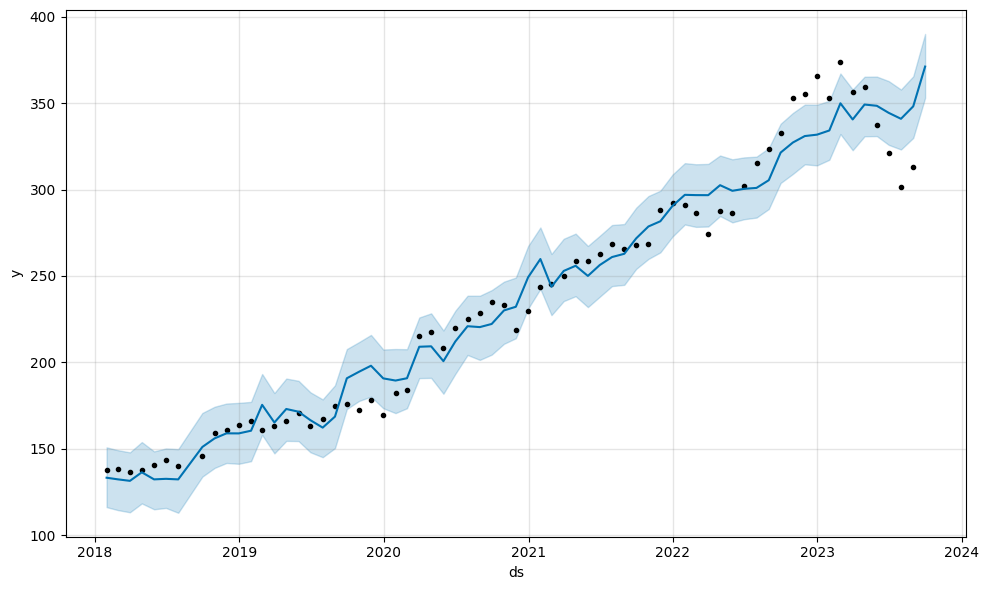

In [9]:
fig1= m.plot(forecast)

In [10]:
args = forecast[['ds','yhat','yhat_lower', 'yhat_upper']]

In [11]:
df['y']= pd.to_numeric(df['Interna1_Billo'].str.replace(',', '.'), errors='coerce')
print(df)

        Fecha  Moneda Interna1_Billo Externa_Billo Total_Billo         ds  \
0  2018-01-31       1          273,6         137,9       411,5 2018-01-31   
1  2018-02-28       1          279,1         138,3       417,3 2018-02-28   
2  2018-03-31       1          280,6         136,6       417,1 2018-03-31   
3  2018-04-30       1          287,8         138,0       425,8 2018-04-30   
4  2018-05-31       1          293,7         140,6       434,4 2018-05-31   
..        ...     ...            ...           ...         ...        ...   
62 2022-10-31       1          495,9         353,0       848,9 2022-10-31   
63 2022-12-31       1          507,3         365,5       872,7 2022-12-31   
64 2023-01-31       1          513,9         353,0       867,0 2023-01-31   
65 2023-02-28       1          509,6         373,9       883,4 2023-02-28   
66 2023-04-30       1          532,0         359,1       891,1 2023-04-30   

        y  
0   273.6  
1   279.1  
2   280.6  
3   287.8  
4   293.7  
.. 

In [12]:
m2= Prophet()
m2.fit(df)

20:21:11 - cmdstanpy - INFO - Chain [1] start processing
20:21:11 - cmdstanpy - INFO - Chain [1] done processing


In [13]:
future2 = m2.make_future_dataframe(periods=1,freq='A')
future2.tail()

,ds
63,2023-05-31
64,2023-06-30
65,2023-07-31
66,2023-08-31
67,2023-12-31


In [14]:
forecast2=m2.predict(future2)
forecast2[['ds','yhat','yhat_lower', 'yhat_upper' ]]

,ds,yhat,yhat_lower,yhat_upper
0,2018-01-31,274.691498,271.628597,277.944118
1,2018-02-28,279.185468,275.823389,282.380194
2,2018-03-31,282.904229,279.711905,286.120680
3,2018-04-30,287.647740,284.231841,290.872411
4,2018-05-31,293.991668,290.632815,297.312752
...,...,...,...,...
63,2023-05-31,536.668784,533.441320,539.909991
64,2023-06-30,543.044047,539.843510,546.344224
65,2023-07-31,546.142281,542.973099,549.344604
66,2023-08-31,552.461571,549.381563,555.610148


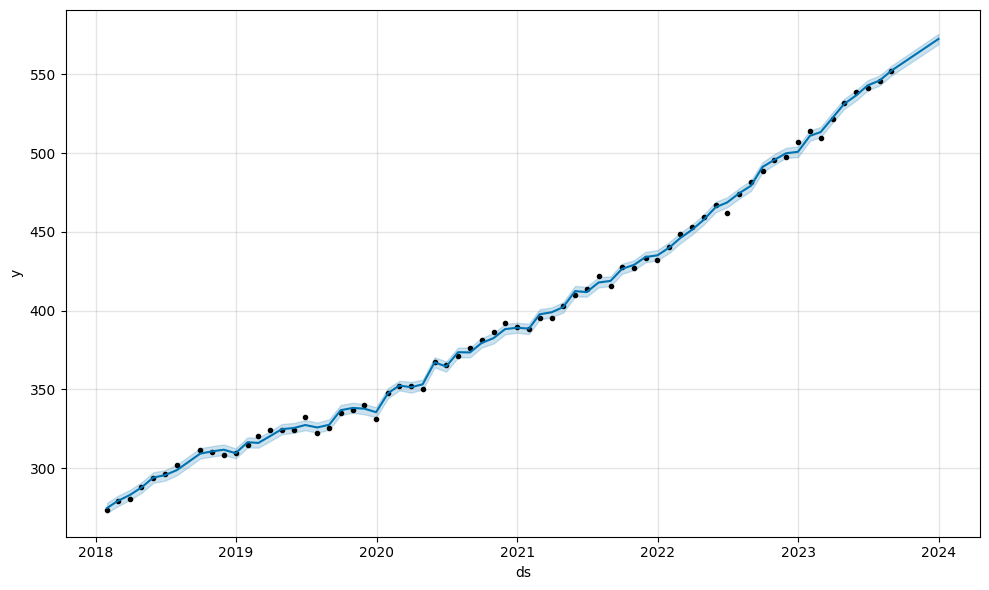

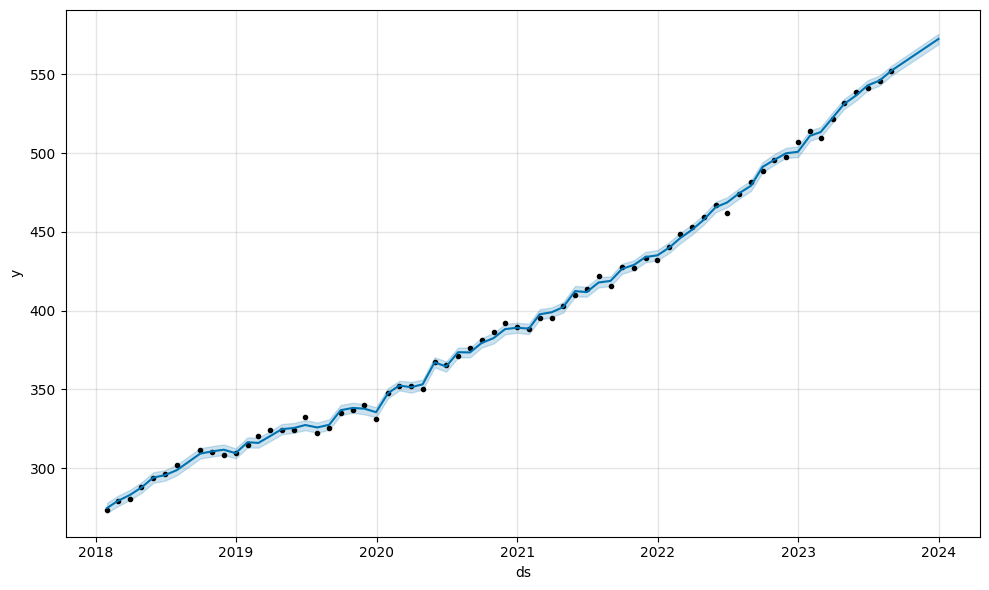

In [15]:
args2 = forecast2[['ds','yhat','yhat_lower', 'yhat_upper']]
m2.plot(forecast2)

In [16]:
df['y']= pd.to_numeric(df['Total_Billo'].str.replace(',', '.'), errors='coerce')


In [17]:
m3 = Prophet()
m3.fit(df)

20:21:46 - cmdstanpy - INFO - Chain [1] start processing
20:21:47 - cmdstanpy - INFO - Chain [1] done processing


In [18]:
future3 = m3.make_future_dataframe(periods=1,freq='A')
future3.tail()

,ds
63,2023-05-31
64,2023-06-30
65,2023-07-31
66,2023-08-31
67,2023-12-31


In [19]:
forecast3=m3.predict(future3)
forecast3[['ds','yhat','yhat_lower', 'yhat_upper' ]]

,ds,yhat,yhat_lower,yhat_upper
0,2018-01-31,416.356312,398.584952,433.253207
1,2018-02-28,419.475247,402.912310,436.709344
2,2018-03-31,421.050422,404.084582,437.346127
3,2018-04-30,429.532365,412.379233,446.643204
4,2018-05-31,430.492525,412.845907,447.027125
...,...,...,...,...
63,2023-05-31,881.274276,864.315794,898.655294
64,2023-06-30,883.014409,864.406142,902.102094
65,2023-07-31,882.549815,866.104061,900.725780
66,2023-08-31,895.644350,877.395986,914.012681


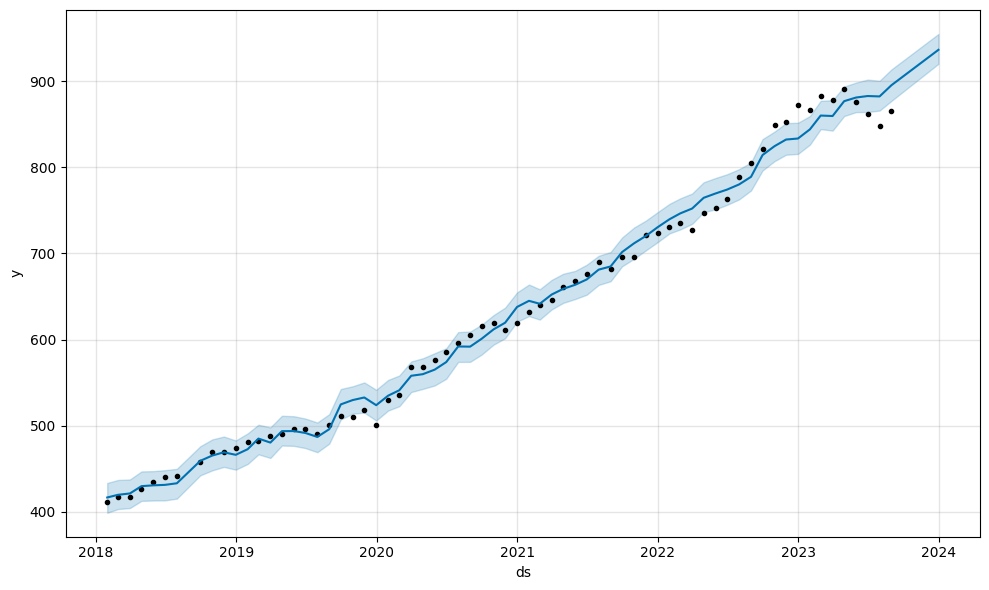

In [20]:
fg2 = m3.plot(forecast3)

In [21]:
args3 = forecast3[['ds','yhat','yhat_lower', 'yhat_upper']]

In [31]:
#externo
url = "http://localhost:4000/prediccion"
data = {"datos": args.astype({'ds': 'str'}).to_dict(orient='records') }
print("enviar", data )

reponse = requests.post(url=url,json=data)
print("status res:",reponse.status_code)
print("respuesta servidor:", reponse.text)

enviar {'datos': [{'ds': '2018-01-31', 'yhat': 133.34611188334657, 'yhat_lower': 116.34547471012684, 'yhat_upper': 150.90029761326312}, {'ds': '2018-02-28', 'yhat': 132.41863745585752, 'yhat_lower': 114.64896834143838, 'yhat_upper': 149.28322706623004}, {'ds': '2018-03-31', 'yhat': 131.534444941064, 'yhat_lower': 113.35260765339648, 'yhat_upper': 148.00854187287732}, {'ds': '2018-04-30', 'yhat': 136.48386872620142, 'yhat_lower': 118.48008645373729, 'yhat_upper': 153.95929721367892}, {'ds': '2018-05-31', 'yhat': 132.38611958438727, 'yhat_lower': 115.08998801541924, 'yhat_upper': 148.56968043722543}, {'ds': '2018-06-30', 'yhat': 132.70446796908251, 'yhat_lower': 115.87937279038262, 'yhat_upper': 150.26515343913562}, {'ds': '2018-07-31', 'yhat': 132.3772233294596, 'yhat_lower': 113.07268317859928, 'yhat_upper': 149.87000034559}, {'ds': '2018-09-30', 'yhat': 151.1364058169293, 'yhat_lower': 133.98330946981883, 'yhat_upper': 170.78419471044836}, {'ds': '2018-10-31', 'yhat': 156.113660205229

In [32]:
#interno
data = {"datos": args2.astype({'ds': 'str'}).to_dict(orient='records')}
print("enviar", data )

reponse = requests.post(url=url,json=data)
print("status res:",reponse.status_code)
print("respuesta servidor:", reponse.text)

enviar {'datos': [{'ds': '2018-01-31', 'yhat': 274.69149802571724, 'yhat_lower': 271.6285965128546, 'yhat_upper': 277.944117727314}, {'ds': '2018-02-28', 'yhat': 279.1854681648226, 'yhat_lower': 275.8233886913255, 'yhat_upper': 282.380193716595}, {'ds': '2018-03-31', 'yhat': 282.9042287429042, 'yhat_lower': 279.7119049879152, 'yhat_upper': 286.12068049986425}, {'ds': '2018-04-30', 'yhat': 287.6477397618315, 'yhat_lower': 284.2318412055288, 'yhat_upper': 290.8724109544572}, {'ds': '2018-05-31', 'yhat': 293.99166779239505, 'yhat_lower': 290.63281494582753, 'yhat_upper': 297.3127517092349}, {'ds': '2018-06-30', 'yhat': 295.50506294863743, 'yhat_lower': 292.00983342546726, 'yhat_upper': 298.6700187518359}, {'ds': '2018-07-31', 'yhat': 298.6873559281686, 'yhat_lower': 295.40720882243363, 'yhat_upper': 302.12731089195404}, {'ds': '2018-09-30', 'yhat': 309.21711915328984, 'yhat_lower': 306.10453701784485, 'yhat_upper': 312.6741088998766}, {'ds': '2018-10-31', 'yhat': 310.63837088692736, 'yhat

In [33]:

#total
data = {"datos": args3.astype({'ds': 'str'}).to_dict(orient='records')  }
print("enviar", data )

reponse = requests.post(url=url,json=data)
print("status res:",reponse.status_code)
print("respuesta servidor:", reponse.text)

enviar {'datos': [{'ds': '2018-01-31', 'yhat': 416.3563120549627, 'yhat_lower': 398.5849515772023, 'yhat_upper': 433.2532071441643}, {'ds': '2018-02-28', 'yhat': 419.47524653143824, 'yhat_lower': 402.9123103892557, 'yhat_upper': 436.70934422726344}, {'ds': '2018-03-31', 'yhat': 421.0504221375666, 'yhat_lower': 404.0845819393462, 'yhat_upper': 437.34612664290825}, {'ds': '2018-04-30', 'yhat': 429.5323653376012, 'yhat_lower': 412.3792328405006, 'yhat_upper': 446.64320353023174}, {'ds': '2018-05-31', 'yhat': 430.49252510644806, 'yhat_lower': 412.8459073630775, 'yhat_upper': 447.0271248910512}, {'ds': '2018-06-30', 'yhat': 431.02926764928975, 'yhat_lower': 412.9890611789709, 'yhat_upper': 448.0958613253268}, {'ds': '2018-07-31', 'yhat': 432.88690115448384, 'yhat_lower': 415.01943254035757, 'yhat_upper': 449.6723932224668}, {'ds': '2018-09-30', 'yhat': 458.9751469532592, 'yhat_lower': 442.1425194120757, 'yhat_upper': 475.98360554892923}, {'ds': '2018-10-31', 'yhat': 465.12783449346097, 'yha